In [14]:
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image

In [29]:
atribut = ['jenis_kelamin','agama','jurusan','asal_sekolah','kota_asal','registrasi']
ds = pd.read_csv(r'Book2.csv', header=None, names=atribut)
ds.head()

,jenis_kelamin,agama,jurusan,asal_sekolah,kota_asal,registrasi
0,LAKI-LAKI,ISLAM,INFORMATIKA,SMK,JAKARTA,YA
1,LAKI-LAKI,ISLAM,INFORMATIKA,SMK,TANGERANG,YA
2,PEREMPUAN,KRISTEN,INFORMATIKA,SMK,JAKARTA,TIDAK
3,LAKI-LAKI,ISLAM,INFORMATIKA,SMK,JAKARTA,YA
4,PEREMPUAN,ISLAM,INFORMATIKA,SMK,TANGERANG,YA


In [30]:
mahasiswa = pd.get_dummies(ds[['jenis_kelamin','agama','jurusan','asal_sekolah','kota_asal']])
mahasiswa.head()

,jenis_kelamin_LAKI-LAKI,jenis_kelamin_PEREMPUAN,agama_ISLAM,agama_KRISTEN,jurusan_AKUNTANSI,jurusan_EKONOMI,jurusan_INFORMATIKA,jurusan_MESIN,jurusan_SASTRA BAHASA,jurusan_SASTRA INGGRIS,asal_sekolah_SMA,asal_sekolah_SMK,kota_asal_JAKARTA,kota_asal_TANGERANG
0,1,0,1,0,0,0,1,0,0,0,0,1,1,0
1,1,0,1,0,0,0,1,0,0,0,0,1,0,1
2,0,1,0,1,0,0,1,0,0,0,0,1,1,0
3,1,0,1,0,0,0,1,0,0,0,0,1,1,0
4,0,1,1,0,0,0,1,0,0,0,0,1,0,1


In [31]:
hasil = tree.DecisionTreeClassifier(criterion='entropy')
hasil_train = hasil.fit(mahasiswa, ds['registrasi'])

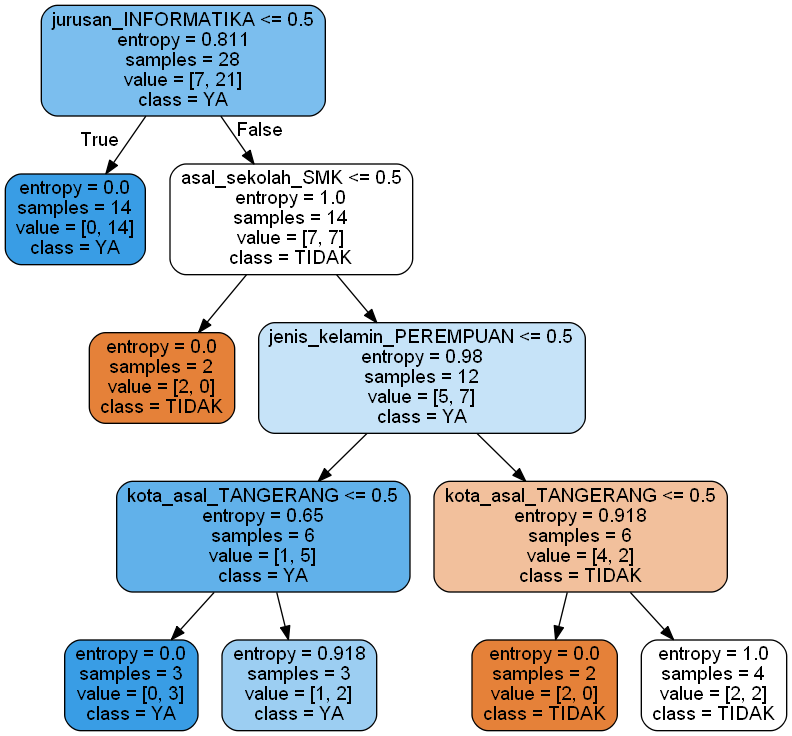

In [32]:
dot_data = tree.export_graphviz(hasil_train, out_file=None, feature_names=list(mahasiswa.columns.values),
                                class_names=['TIDAK','YA'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [35]:
# Test model Decision Tree
#Jenis Kelamin = LAKI-LAKI, Agama = ISLAM, Jurusan = INFORMATIKA, Asal Sekolah = SMK, Kota Asal = JAKARTA

prediksi = hasil_train.predict([[1,0,1,0,0,0,1,0,0,0,0,1,1,0]])
prediksi

array(['YA'], dtype=object)